In [16]:
!pip install pyspark

In [17]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, year, month, avg, to_date
import matplotlib.pyplot as plt


In [18]:
spark = SparkSession.builder \
    .appName("GoldPriceVisualization") \
    .getOrCreate()


In [19]:
from google.colab import files
uploaded = files.upload()


Saving gold_price_forecasting_dataset.csv to gold_price_forecasting_dataset (2).csv


In [20]:
df = spark.read.csv("gold_price_forecasting_dataset.csv",
                    header=True,
                    inferSchema=True)


In [21]:
df = df.withColumn("date", to_date(col("date")))
df.printSchema()


root
 |-- date: date (nullable = true)
 |-- adj close: double (nullable = true)
 |-- close: double (nullable = true)
 |-- high: double (nullable = true)
 |-- low: double (nullable = true)
 |-- open: double (nullable = true)
 |-- volume: integer (nullable = true)
 |-- ma_7: double (nullable = true)
 |-- ma_30: double (nullable = true)
 |-- ma_90: double (nullable = true)
 |-- daily_return: double (nullable = true)
 |-- volatility_7: double (nullable = true)
 |-- volatility_30: double (nullable = true)
 |-- rsi: double (nullable = true)
 |-- macd: double (nullable = true)
 |-- macd_signal: double (nullable = true)
 |-- bb_upper: double (nullable = true)
 |-- bb_lower: double (nullable = true)



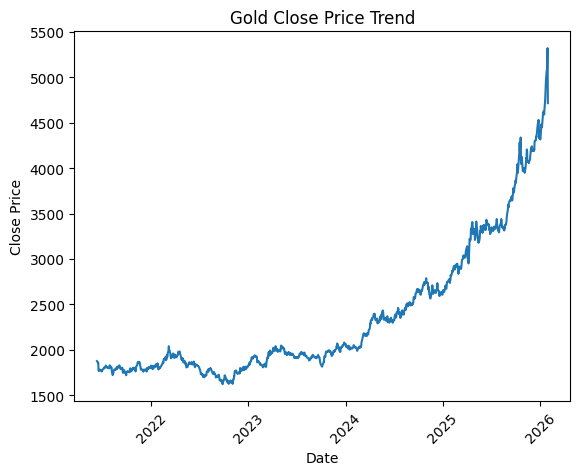

In [22]:
price_df = df.select("date", "close") \
             .orderBy("date") \
             .toPandas()

plt.figure()
plt.plot(price_df["date"], price_df["close"])
plt.title("Gold Close Price Trend")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.xticks(rotation=45)
plt.show()


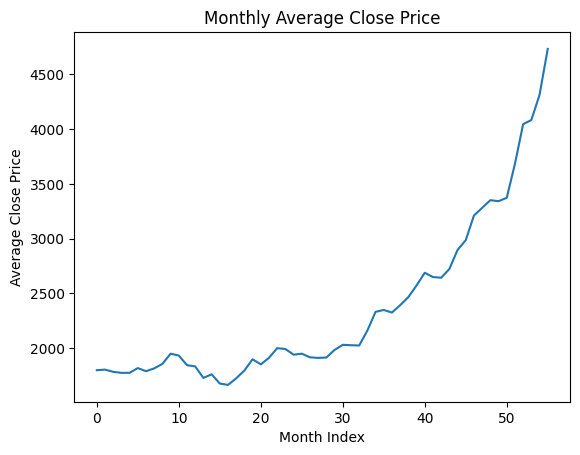

In [23]:
monthly_avg = df.withColumn("year", year(col("date"))) \
                .withColumn("month", month(col("date"))) \
                .groupBy("year", "month") \
                .agg(avg("close").alias("avg_close")) \
                .orderBy("year", "month")

monthly_pd = monthly_avg.toPandas()

plt.figure()
plt.plot(range(len(monthly_pd)), monthly_pd["avg_close"])
plt.title("Monthly Average Close Price")
plt.xlabel("Month Index")
plt.ylabel("Average Close Price")
plt.show()


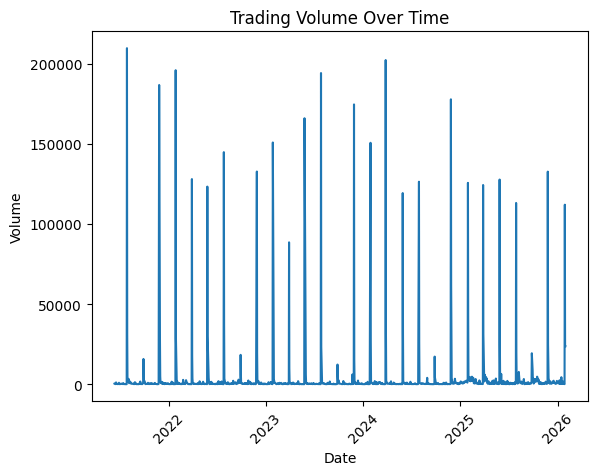

In [24]:
volume_df = df.select("date", "volume") \
              .orderBy("date") \
              .toPandas()

plt.figure()
plt.plot(volume_df["date"], volume_df["volume"])
plt.title("Trading Volume Over Time")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.xticks(rotation=45)
plt.show()



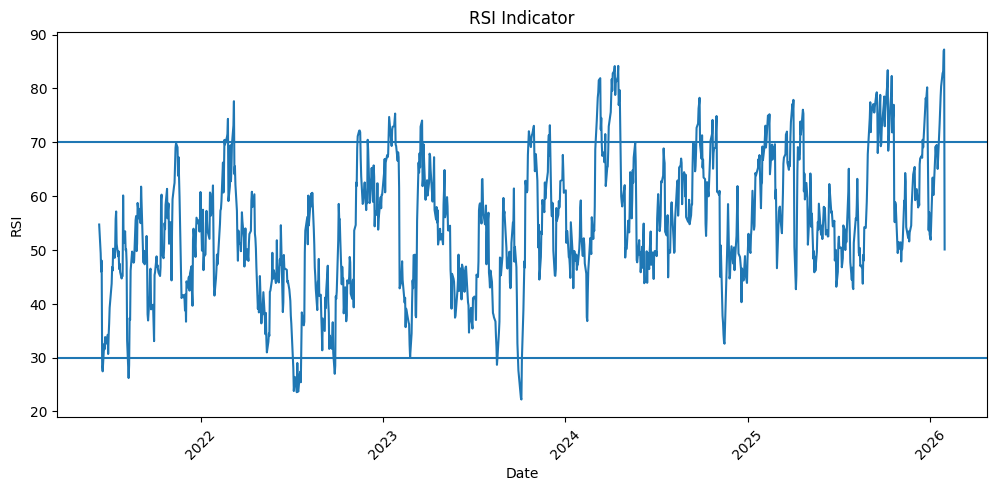

In [25]:
rsi_pd = df.select("date", "rsi").orderBy("date").toPandas()

plt.figure(figsize=(12,5))
plt.plot(rsi_pd["date"], rsi_pd["rsi"])
plt.axhline(70)
plt.axhline(30)
plt.title("RSI Indicator")
plt.xlabel("Date")
plt.ylabel("RSI")
plt.xticks(rotation=45)
plt.show()


In [26]:
top5_table = df.select("date", "close", "volume") \
    .orderBy(col("close").desc()) \
    .limit(5)

top5_table.show()


+----------+----------------+------+
|      date|           close|volume|
+----------+----------------+------+
|2026-01-29|5318.39990234375| 23709|
|2026-01-28|5301.60009765625|112054|
|2026-01-27|5079.89990234375|    34|
|2026-01-26| 5079.7001953125|   180|
|2026-01-23| 4976.2001953125|   169|
+----------+----------------+------+



In [27]:
indicator_table = df.select(
    avg("rsi").alias("Average_RSI"),
    avg("volatility_7").alias("Average_Volatility_7"),
    avg("macd").alias("Average_MACD")
)

indicator_table.show()


+-----------------+--------------------+------------------+
|      Average_RSI|Average_Volatility_7|      Average_MACD|
+-----------------+--------------------+------------------+
|54.59818709314273|0.009372690930191569|16.332400193540416|
+-----------------+--------------------+------------------+

